# Classfication of Iris Flowers

Feature names are  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4) [5.1 3.5 1.4 0.2]
Target names are  ['setosa' 'versicolor' 'virginica']
(150,) 0


Text(0, 0.5, 'Label')

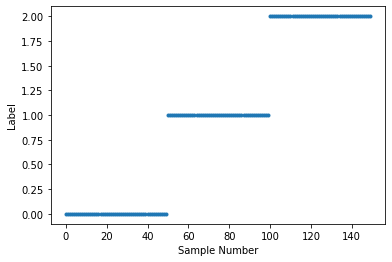

In [2]:
from matplotlib.pyplot import *
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target
target_names = iris['target_names']
feature_names = iris['feature_names']
print('Feature names are ', feature_names)
print(x.shape, x[0])
print('Target names are ', target_names)
print(y.shape, y[0])
plot(y,'.')    # labels are integers (0, 1, or 2)
xlabel('Sample Number')
ylabel('Label')

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_labels = to_categorical(y_train) # convert labels to 1-hot vectors
test_labels = to_categorical(y_test)

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(4,)))  # input shape matches the number of features (4)
model.add(Dense(3, activation='softmax'))                  # the number of neurons in the output layer is the same of the number of classes (3)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(x_train, train_labels, epochs=100, verbose=0, validation_split=0.2)

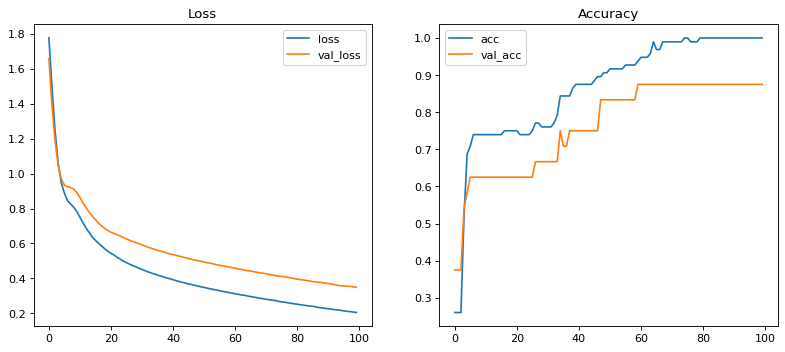

In [15]:
figure(figsize=(12, 5), dpi=80)
subplot(121);title('Loss')
plot(history.epoch,history.history['loss'])
plot(history.epoch,history.history['val_loss'])
legend(['loss','val_loss'])
subplot(122);title('Accuracy')
plot(history.epoch,history.history['acc'])
plot(history.epoch,history.history['val_acc'])
legend(['acc','val_acc'])

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import SparseCategoricalAccuracy
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(4,)))  # input shape matches the number of features (4)
model.add(Dense(3, activation='softmax'))                  # the number of neurons in the output layer is the same of the number of classes (3)
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=[SparseCategoricalAccuracy(name="acc")])
history = model.fit(x_train, y_train, epochs=100, verbose=0, validation_split=0.2)

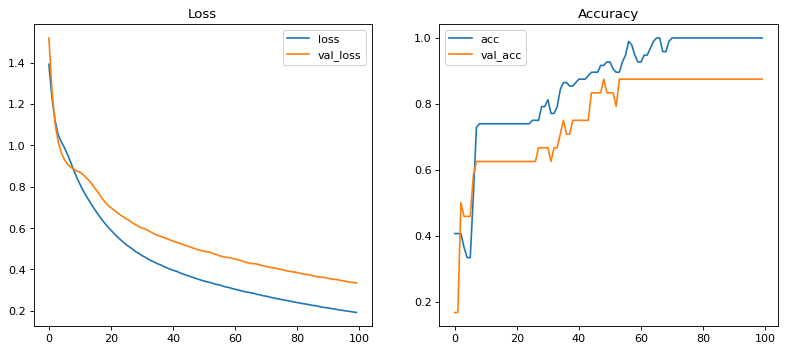

In [9]:
figure(figsize=(12, 5), dpi=80)
subplot(121);title('Loss')
plot(history.epoch,history.history['loss'])
plot(history.epoch,history.history['val_loss'])
legend(['loss','val_loss'])
subplot(122);title('Accuracy')
plot(history.epoch,history.history['acc'])
plot(history.epoch,history.history['val_acc'])
legend(['acc','val_acc'])

In [10]:
feature_names[0]

'sepal length (cm)'

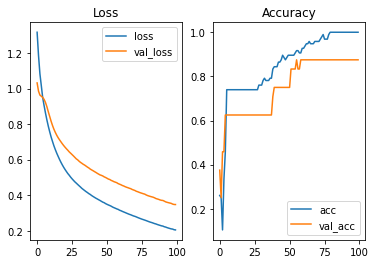

In [16]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
y_train = to_categorical(y_train) # convert labels to 1-hot
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(4,))) 
model.add(Dense(3, activation='softmax'))
model.compile(optimizer="adam",loss="categorical_crossentropy",
  metrics=["acc"])
h = model.fit(x_train,y_train,epochs=100,validation_split=0.2,verbose=0)
subplot(121);title('Loss')
plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
legend(['loss','val_loss'])
subplot(122);title('Accuracy')
plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
legend(['acc','val_acc'])

# Classification of Images of Handwritten Digits (MNIST Dataset)

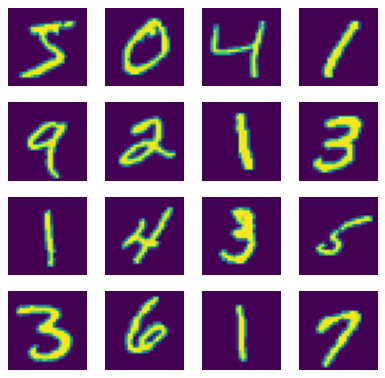

In [23]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32")
y_train = y_train.astype("float32")
x_test = x_test.astype("float32")
y_test = y_test.astype("float32")
figure(figsize=(6, 6), dpi=80)
for i in range(16):
  subplot(4,4,i+1)
  imshow(x_train[i])
  axis('off')


In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import SparseCategoricalAccuracy
x_train, x_test = x_train / 255.0, x_test / 255.0
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=[SparseCategoricalAccuracy(name="acc")])
h = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=0, validation_split=0.2)

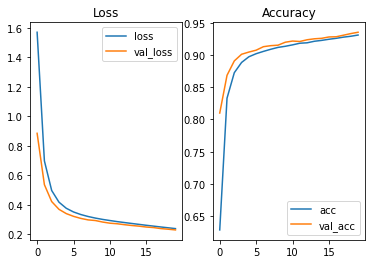

In [27]:
subplot(121);title('Loss')
plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
legend(['loss','val_loss'])
subplot(122);title('Accuracy')
plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
legend(['acc','val_acc'])

In [28]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 0s 3ms/step - loss: 0.2341 - acc: 0.9325
test loss, test acc: [0.234136164188385, 0.9325000047683716]


1/1 [==============================] - 0s 24ms/step


Text(0.5, 1.0, 'Label = 6')

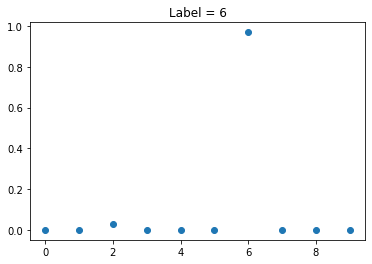

In [38]:
import numpy as np
predictions = model.predict(x_test[100])
plot(np.arange(10),predictions[0],'o')
title("Label = %i" % y_test[100])

# Classification of Images of Beans

In [3]:
import tensorflow_datasets as tfds
x_train, y_train = tfds.as_numpy(tfds.load('beans',
  split='train', batch_size=-1, as_supervised=True,))
x_val, y_val = tfds.as_numpy(tfds.load('beans', 
  split='validation', batch_size=-1, as_supervised=True,))
x_test, y_test = tfds.as_numpy(tfds.load('beans', split='test', 
  batch_size=-1, as_supervised=True,))
label_names = ['Angular Left Spot', 'Bean Rust', 'Healthy']

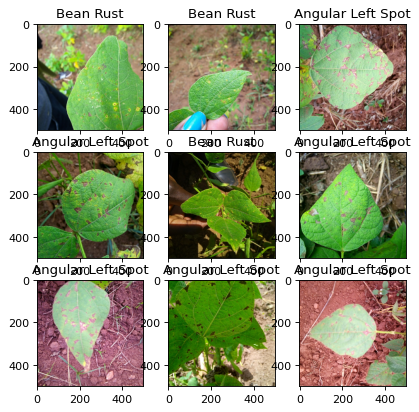

In [4]:
from matplotlib.pyplot import *
figure(figsize=(6,6), dpi=80)
for i in range(9):
  subplot(3,3,i+1)
  imshow(x_train[i])
  title(label_names[y_train[i]])

In [13]:
print(x_train.shape, y_train.shape, y_train[20:30])

(1034, 500, 500, 3) (1034,) [1 1 2 1 2 1 1 1 2 0]


In [5]:
from tensorflow.keras.utils import to_categorical
x_train = x_train.astype("float32") / 255
x_val = x_val.astype("float32") / 255
x_test = x_test.astype("float32") / 255
num_classes = 3
y_train2 = to_categorical(y_train, num_classes)
y_val2 = to_categorical(y_val, num_classes)
y_test2 = to_categorical(y_test, num_classes)

In [29]:
print(x_train.dtype, y_train2.dtype, y_train2[0])

float32 float32 [0. 1. 0.]


In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Resizing
model = Sequential()
model.add(Input(shape=(500, 500, 3)))
model.add(Resizing(100,100))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 100, 100, 3)       0         
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 100)               3000100   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 3,020,603
Trainable params: 3,020,603
Non-

## CPU vs GPU
- On a machine with an NVIDIA GPU, Tensorflow will automatically run on the GPU instead of running on the CPU.
- In my case, Tensorflow tried to copy data from the host memory to the GPU memory but failed to do so. Probably the Beans dataset is too large.
- To run Tensorflow on the CPU, we can use the following statement.
       with tf.device('/CPU:0'):
- The code at the bottom shows how to use this statement.

In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["acc"])
h = model.fit(x_train, y_train2, epochs=10, validation_split=0.2, batch_size=1)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

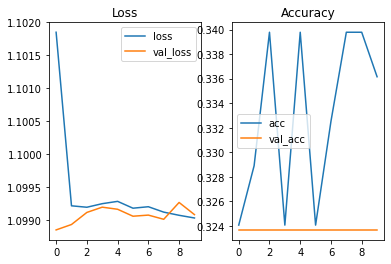

In [7]:
subplot(121);title('Loss')
plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
legend(['loss','val_loss'])
subplot(122);title('Accuracy')
plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
legend(['acc','val_acc'])

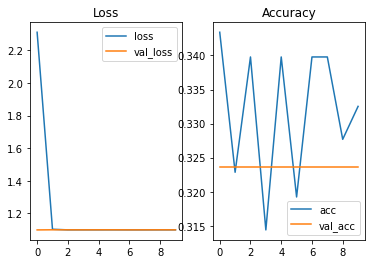

In [10]:
subplot(121);title('Loss')
plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
legend(['loss','val_loss'])
subplot(122);title('Accuracy')
plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
legend(['acc','val_acc'])

In [8]:
# This code can run on the CPU without resizing the images.
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Resizing
model = Sequential()
model.add(Input(shape=(500, 500, 3)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
with tf.device('/CPU:0'):
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["acc"])
    h = model.fit(x_train, y_train2, epochs=10, validation_split=0.2, batch_size=100)


Epoch 1/10
9/9 [==============================] - 4s 363ms/step - loss: 83.8457 - acc: 0.3241 - val_loss: 51.5035 - val_acc: 0.3237
Epoch 2/10
9/9 [==============================] - 3s 363ms/step - loss: 30.9832 - acc: 0.3374 - val_loss: 14.1413 - val_acc: 0.3285
Epoch 3/10
9/9 [==============================] - 3s 365ms/step - loss: 21.0583 - acc: 0.3519 - val_loss: 18.4921 - val_acc: 0.3527
Epoch 4/10
9/9 [==============================] - 3s 343ms/step - loss: 15.4880 - acc: 0.3676 - val_loss: 6.8789 - val_acc: 0.4734
Epoch 5/10
9/9 [==============================] - 3s 335ms/step - loss: 13.3236 - acc: 0.4015 - val_loss: 28.6755 - val_acc: 0.3285
Epoch 6/10
9/9 [==============================] - 3s 334ms/step - loss: 21.1417 - acc: 0.4667 - val_loss: 10.6571 - val_acc: 0.4300
Epoch 7/10
9/9 [==============================] - 3s 353ms/step - loss: 11.9959 - acc: 0.4401 - val_loss: 12.4179 - val_acc: 0.4638
Epoch 8/10
9/9 [==============================] - 3s 336ms/step - loss: 7.142

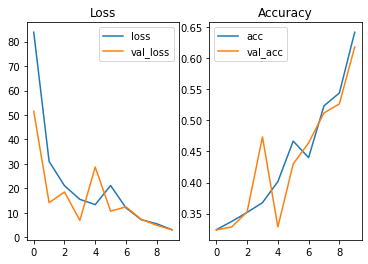

In [9]:
subplot(121);title('Loss')
plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
legend(['loss','val_loss'])
subplot(122);title('Accuracy')
plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
legend(['acc','val_acc'])